# Project 5

# Introduction

In this project, we will be simulating the spread of a contagious disease by representing the epidemic as an array. The model represents a population of cells where each cell has an associated value indicating its status:

0 - Healthy (not infected)

1 - Sick (currently infected)

2 - Healed (previously infected but now recovered)

We start with a 200x200 grid of cells, initially placing a 4x4 array of infected cells at the center. The array represents the population of cells and their infection status over time.

To model the progression of the disease, we use two probability values, $p_I$ and $p_R$, both ranging between 0 and 1. $p_I$ represents the probability of infection, indicating how likely a sick cell will infect its healthy neighbors. $p_R$ represents the probability of recovery, determining the likelihood of a sick cell recovering on a given day.

The disease spread evolves according to the following rules:

A healthy cell (value 0) will become infected the next day with a probability of $1-(1-p_I)^n$, where n is the number of infected neighbors (cells sharing an edge or corner).
A sick cell (value 1) will recover the next day with a probability of $p_R$. Once a cell recovers, it cannot get sick again.
A healed cell (value 2) remains healed and cannot get infected again.
To simulate the spread of the disease, we will develop a function called `Epidemics()` that takes a 200x200 array of cells with given states (0, 1, or 2) and returns the array showing the state of the cells on the next day. The function will take into account the infection probability $p_I$ and recovery probability $p_R$ to determine the state transitions for each cell in the array. By iterating the function, we can observe the spread of the disease over time and analyze the impact of different probabilities on the disease dynamics. Then, we do the same analysis on a population of cells that have a certain percentage of cells that are vaccinated using a function called `Vaccination()`. To analyze the model parameters of $p_I$, $p_R$, and the percentage of vaccinated cells we will be using animations to make observations about the disease dynamics.

## Part 1

Necessary packages for the functions in this project.

In [3]:
import random
import numpy as np

### Starting State

We can start by creating a function `StartingState()` that will generate a $n \times n$ array of all zeros with a $4 \times 4$ grid of all ones at the center of the array to model the epidemic.

In [4]:
def StartingState(n):
    arr = np.zeros((n,n),dtype=int)
    
    # Calculate the center index of the array
    center = n//2
    
    # Set a 4x4 square of ones in the center of the array
    arr[center-2:center+2,center-2:center+2] = np.ones((4,4),dtype=int)
    
    # Return the resulting array
    return arr

For this project, we will be using a $200 \times 200$ array of all zeros with a $4 \times 4$ array of all ones centered in the array.

In [5]:
init_state = StartingState(200)

The initial state consists of 16 infected cells in the center surrounded by healthy cells.

### Probability of Infection

The function `Infection()` will calculate the probability of a healthy cell being infected and returns the value of the cell depending on this probability.

In [6]:
def Infection(arr, i, j, p_I):
    # Count the number of sick neighbors "n" around the healthy cell
    n = np.sum(arr[i-1:i+2, j-1:j+2] == 1)
    
    # Calculate the probability of the healthy cell getting sick
    p = 1 - (1 - p_I) ** n
    
    # If a random value is less than the probability, the cell gets sick
    if np.random.rand() < p:
        return 1  # The cell gets sick
    
    return 0  # The cell remains healthy

### Probability of Recovery

The function `RecoveryProb()` will calculate the probability of a sick cell recovering from the infection and returns the value of the cell depending on this probability.

In [7]:
def Recovery(p_R):
    # If a random value is less than the probability of recovery, the cell recovers
    if np.random.rand() < p_R:
        return 2  # The cell recovers
    
    return 1  # The cell remains sick

### Updating The State of The Array

The function `Epidemics()` will update the state of the array to mimic how the epidemic changes over in a subsequent iteration or in a single unit of time.

In [8]:
def Epidemics(arr, p_I, p_R):
    # Create a copy of the array to store the new state
    updated_arr = np.copy(arr)
    
    # Get the dimensions of the array
    i, j = arr.shape

    # Iterate through each cell in the array (excluding the borders)
    # By excluding the borders, we effectively create a 'border' using the original array
    # This eliminates the need to broadcast our array onto another array
    for row in range(1, i-1):
        for col in range(1, j-1):
            cell = arr[row, col]

            # If the cell is healthy (0), handle it using the Infection() function
            if cell == 0:
                updated_arr[row, col] = Infection(arr, row, col, p_I)
                
            # If the cell is sick (1), handle it using the Recovery() function
            elif cell == 1:
                updated_arr[row, col] = Recovery(p_R)

    return updated_arr

## Part 2

Below is the code that animates the `Epidemics()` function. Code comments have been omitted. `x` is the only variable that was changed to specify the intial state and the function that we are using.

<IPython.core.display.Javascript object>


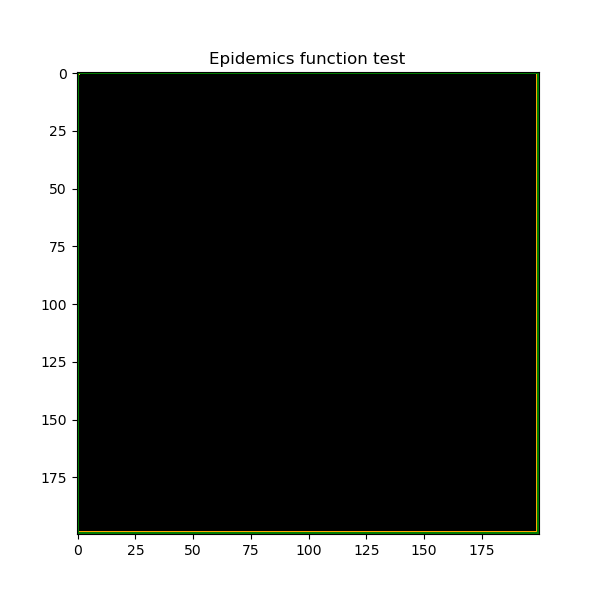

In [9]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemics function test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Epidemics(x, 0.7, 0.6)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

## Part 3

### Model Parameters `p_I` and `p_R`

The parameters $p_I$ (probability of infection) and $p_R$ (probability of recovery) have a significant impact on the spread of the disease. To understand their effects, we can look at a few scenarios.

#### High $p_I$ and low $p_R$

In this scenario, the probability of infection is high, and the probability of recovery is low. As a result, the disease will spread rapidly, and it will take longer for the infected cells to recover. This could lead to a larger number of infected cells and a more widespread epidemic. The animation below depicts this scenario. The disease spreads to the borders of the array more rapidly than the recovery, but eventually all the cells do recover.

<IPython.core.display.Javascript object>


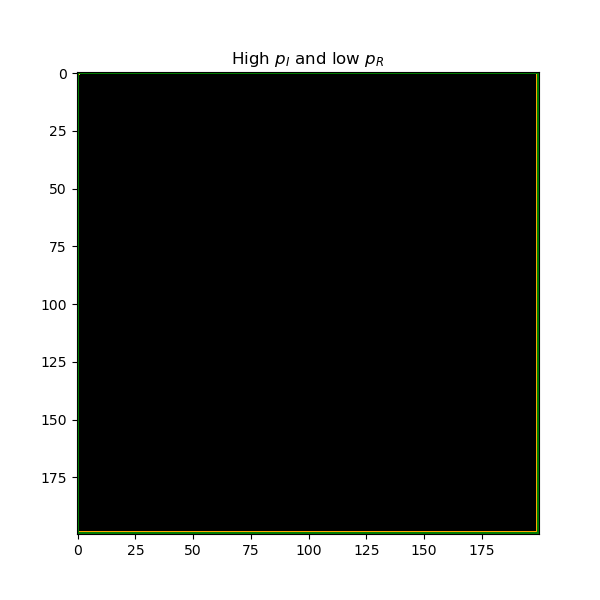

In [10]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("High $p_I$ and low $p_R$")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Epidemics(x, 0.9, 0.1)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### Low $p_I$ and high $p_R$

In this case, the probability of infection is low, and the probability of recovery is high. The disease will spread slowly, and the infected cells will recover relatively quickly. This will result in a smaller number of infected cells and a more contained epidemic. The animation below depicts this scenario. The disease doesn't spread rapidly enough and most if not all the cells become recovered. The disease doesn't spread to the edges of the array.

<IPython.core.display.Javascript object>


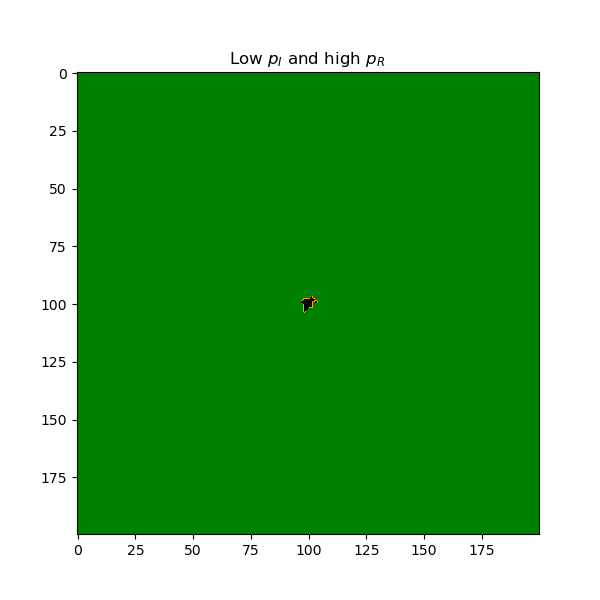

In [13]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Low $p_I$ and high $p_R$")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Epidemics(x, 0.1, 0.9)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=500, blit=True, repeat=False)
plt.show()

#### High $p_I$ and high $p_R$

When both probabilities are high, the disease will spread quickly, but the infected cells will also recover quickly. This might lead to a fast-spreading epidemic with a relatively short duration as the infected cells recover promptly. The animation below depicts this scenario. All cells do eventually become infected, however it immediately follows recovery.

<IPython.core.display.Javascript object>


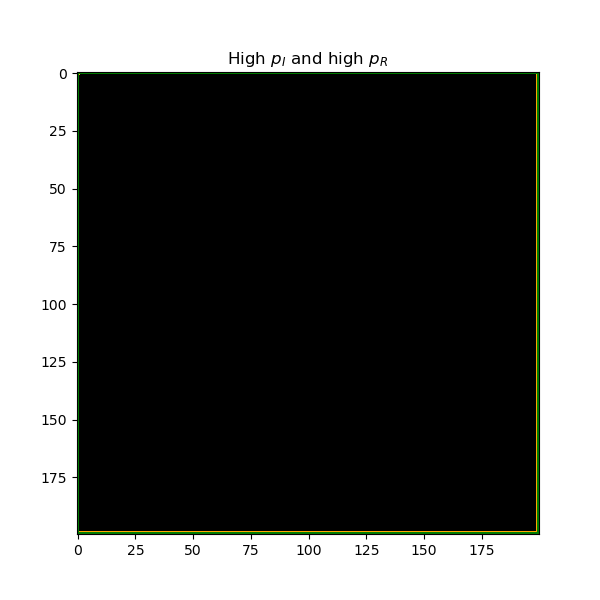

In [14]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("High $p_I$ and high $p_R$")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Epidemics(x, 0.9, 0.9)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### Low $p_I$ and low $p_R$ 

With low probabilities for both infection and recovery, the disease will spread slowly, and the infected cells will take longer to recover. The epidemic will likely be contained but may persist for a longer time due to the slow recovery rate. The animation below depicts this scenario. After a lengthy amount of time, the disease does indeed spread to the edges of the array, but recovery is more patchy as you have some patches of sick people even after a long time after the disease has spread to the edges of the array and the majority of cells have recovered. There are even patches where cells are not infected at all.

<IPython.core.display.Javascript object>


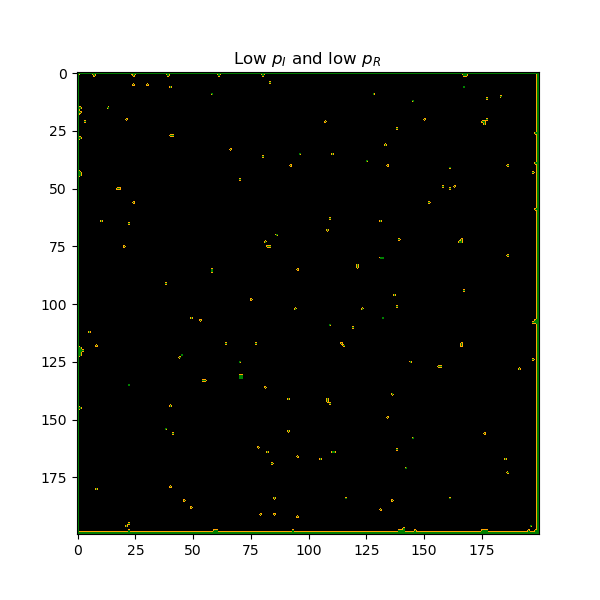

In [15]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Low $p_I$ and low $p_R$")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Epidemics(x, 0.1, 0.1)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

## Part 4

The `Vaccination()` function below mimics a population of cells whereby a certain percentage `percent_vacc` of the cells have been vaccinated.

In [16]:
def Vaccination(arr, p_I, p_R, percent_vacc):
    # Create a copy of the grid to store the new state
    updated_arr = np.copy(arr)
    
    # Get the dimensions of the array
    i, j = arr.shape
    
    # Calculate the total number of cells to be vaccinated
    total_cells = i * j
    num_vaccinated = int(total_cells * percent_vacc)
    
    # Randomly select cells to vaccinate
    for s in range(num_vaccinated):
        row, col = random.randint(1, i - 2), random.randint(1, j - 2)
        updated_arr[row, col] = -1

    # Iterate through each cell in the array (excluding the borders)
    # By excluding the borders, we effectively create a 'border' using the original array
    # This eliminates the need to broadcast our array onto another array
    for row in range(1, i-1):
        for col in range(1, j-1):
            cell = arr[row, col]

            # If the cell is vaccinated (-1), skip to the next cell
            if cell == -1:
                continue

            # If the cell is healthy (0), handle it using the Infection() function
            if cell == 0:
                updated_arr[row, col] = Infection(arr, row, col, p_I)
                
            # If the cell is sick (1), handle it using the Recovery() function
            elif cell == 1:
                updated_arr[row, col] = Recovery(p_R)

    return updated_arr

### Model Parameters `percent_vacc`, `p_I` and `p_R`

When a certain percentage of the population is vaccinated the spread of the disease will be affected in several ways, depending on the percentage of cells that are vaccinated and the initial values of $p_I$ and $p_R$.

#### High `percent_vacc`

With a high vaccination rate, a large percentage of the population is protected from infection. This will limit the spread of the disease, as there will be fewer susceptible cells for the infection to transmit to. The epidemic is likely to be more contained and may die out sooner. The animation below depicts this scenario. As we can see the disease spreads extremely slowly amongst healthy cells whilst trying to navigate through the vaccinated cells, but recovery follows at a similar pace.

<IPython.core.display.Javascript object>


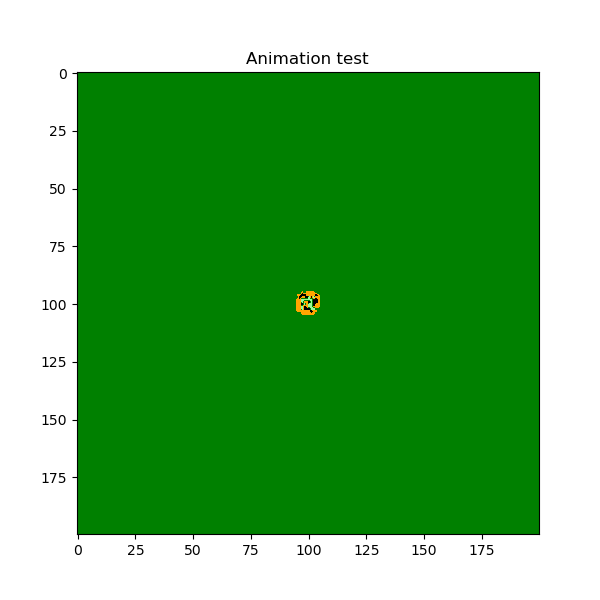

In [32]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Vaccination(x, 0.6, 0.4, 90)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

#### Low `percent_vacc`

In this case, only a small percentage of the population is protected. The disease will still spread among the unvaccinated population, and the overall impact of vaccination on the epidemic might be limited. However, the presence of some vaccinated individuals can still slow down the spread of the disease to a certain extent depending on the other parameters. The animation below depicts this scenario.

<IPython.core.display.Javascript object>


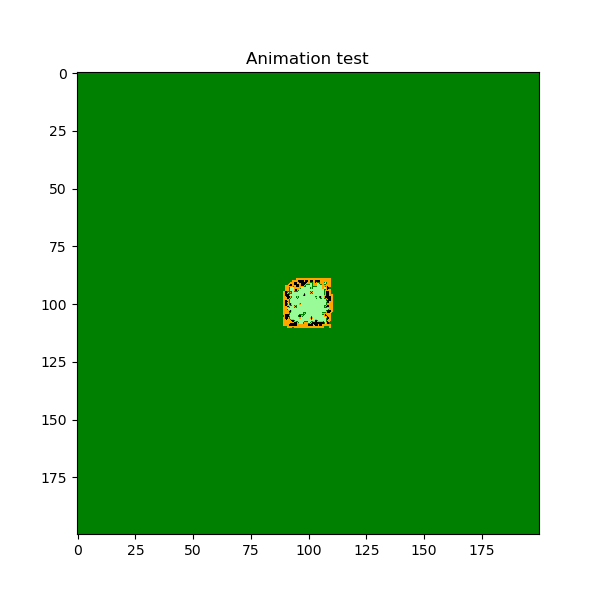

In [22]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Vaccination(x, 0.6, 0.4, 10)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=100, blit=True, repeat=False)
plt.show()

#### High $p_I$ and high `percent_vacc`

When the infection probability is high, but a large percentage of the population is vaccinated, the disease may still spread relatively quickly among the unvaccinated population. The animation below depicts this scenario.

<IPython.core.display.Javascript object>


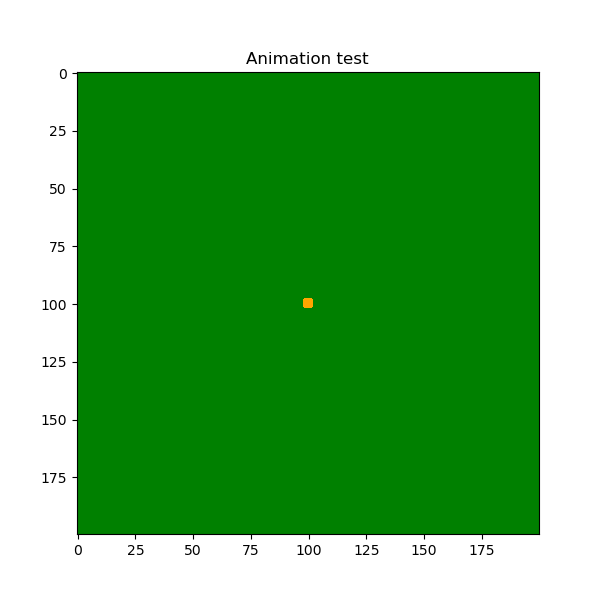

In [30]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Vaccination(x, 0.9, 0.4, 90)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

#### Low $p_I$ and high `percent_vacc`

In this case, both the low probability of infection and the high vaccination rate work together to limit the spread of the disease. The epidemic is likely to be highly contained, with minimal spread among the population.

<IPython.core.display.Javascript object>


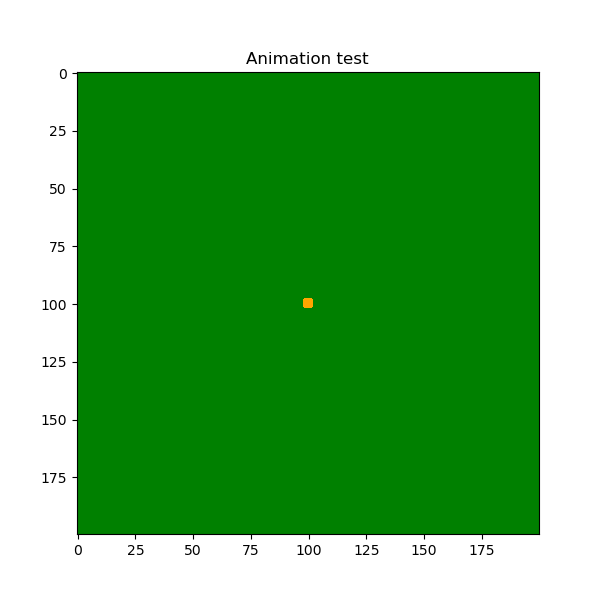

In [31]:
%matplotlib notebook



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

x = init_state

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=Vaccination(x, 0.1, 0.4, 90)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

# Conclusion

In this project, we developed a model to simulate the spread of a contagious disease within a population of cells using Python functions. We began by creating an initial state with healthy cells and a small infected region at the center. To study the disease dynamics, we used functions that calculated the probability of a healthy cell getting infected and a sick cell recovering based on specified parameters. We then iterated through the population and updated the state of each cell accordingly, representing the disease progression over time. Additionally, we extended the model to incorporate a vaccination rate, which allowed us to analyze the impact of vaccination on the spread of the disease. By combining these functions with visualization tools, we created animations to observe the disease spread under various scenarios. This approach provided valuable insights into the factors influencing disease spread.

Using our animation tools we were able to study the effects of different infection ($p_I$) and recovery ($p_R$) probabilities on the disease dynamics and observed how these parameters impact the spread of the disease.

We found that high infection probability and low recovery probability resulted in a rapidly spreading epidemic with a large number of infected cells. On the other hand, low infection probability and high recovery probability led to a slower spread and more contained epidemic.

Additionally, we observed that when both infection and recovery probabilities were high, the epidemic spread quickly but was short-lived due to the rapid recovery of infected cells. When both probabilities were low, the disease spread slowly and persisted for a longer time due to the slow recovery rate.

In the second part of the project, we introduced the concept of vaccination and analyzed the impact of different vaccination rates on the disease spread. We found that a high vaccination rate significantly limited the spread of the disease, while a low vaccination rate had a limited impact on the epidemic. Furthermore, we observed that the combination of low infection probability and high vaccination rate led to a highly contained epidemic with minimal spread among the population.

In [33]:
pwd

'/Users/shahedhanif'